# Predictive Analysis and Simulation of the Future of Work Using AI and Machine Learning

**Student ID:** 1078352  
**Module:** CMP6200 - BSc (Hons) Computer Science  
**Project Title:** Predictive Analysis and Simulation of the Future of Work Using Artificial Intelligence and Machine Learning

## Project Overview

This Jupyter Notebook implements a comprehensive AI/ML predictive model to analyze and forecast the transformation of work environments over the next 5, 10, and 20 years. The analysis focuses on technological, behavioural, and sustainability factors shaping the future of work.

### Methodology
- **Data Collection:** World Bank, Kaggle, IBM Open Data, OECD
- **Models:** Regression, Clustering, Time-Series Forecasting, Deep Learning (TensorFlow)
- **Integration:** IBM Watson for NLP-based prediction refinement
- **Evaluation:** RMSE, Accuracy, R², Bias Testing
- **Ethics:** IEEE AI Ethics Framework, BCU Ethical Application #13740

## 1. Environment Setup and Library Installation

Install and import all required libraries for the project.

In [1]:
# Install required packages (run once)
# !pip install pandas numpy scikit-learn tensorflow matplotlib plotly statsmodels ibm-watson openpyxl

# Standard library imports
import sys
import warnings
warnings.filterwarnings('ignore')

# Data processing libraries
import numpy as np
import pandas as pd
from pathlib import Path

# Machine Learning - Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score

# Deep Learning - TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Time-series forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# IBM Watson (authentication will be configured later)
try:
    from ibm_watson import NaturalLanguageUnderstandingV1
    from ibm_watson.natural_language_understanding_v1 import Features, KeywordsOptions
    watson_available = True
except ImportError:
    watson_available = False
    print("Watson SDK not available. Will use alternative NLP approaches.")

# Verify Python and library versions
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Scikit-learn version: {__import__('sklearn').__version__}")
print(f"Watson SDK available: {watson_available}")
print("\n✓ Environment setup complete!")

Watson SDK not available. Will use alternative NLP approaches.
Python version: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
NumPy version: 2.4.1
Pandas version: 2.3.3
TensorFlow version: 2.20.0
Scikit-learn version: 1.8.0
Watson SDK available: False

✓ Environment setup complete!


## 2. Data Collection from Multiple Sources

Load preprocessed data from the FoW-Sim project pipeline.

In [ ]:
# Set up project paths
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"
RAW_DATA = DATA_DIR / "raw"
PROCESSED_DATA = DATA_DIR / "processed"
INTERIM_DATA = DATA_DIR / "interim"

# NOTEBOOK uses separate demo files to avoid overwriting real app data
NOTEBOOK_DATA_FILE = "notebook_demo_panel.parquet"

print(f"Project root: {PROJECT_ROOT}")
print(f"Data directory: {DATA_DIR}")
print(f"⚠ Notebook uses separate demo data: {NOTEBOOK_DATA_FILE}")

# Generate sample data for notebook demonstration (does NOT use real app data)
print("\n Generating demo data for notebook analysis...")

# Generate comprehensive sample data for 25 countries over 10 years
np.random.seed(42)
countries_list = ['USA', 'GBR', 'DEU', 'JPN', 'CAN', 'AUS', 'FRA', 'ITA', 'CHN', 'IND',
                  'BRA', 'RUS', 'MEX', 'IDN', 'TUR', 'KOR', 'PAK', 'BGD', 'LKA', 'NPL',
                  'SAU', 'ARE', 'ZAF', 'NGA', 'EGY']
years = range(2014, 2024)

records = []
for country in countries_list:
    base_gdp = np.random.uniform(5000, 65000)
    base_unemp = np.random.uniform(3, 12)
    base_internet = np.random.uniform(40, 95)
    base_mobile = np.random.uniform(80, 150)
    base_labor = np.random.uniform(55, 75)
    base_education = np.random.uniform(3, 8)
    
    for i, year in enumerate(years):
        records.append({
            'country': country,
            'iso3': country,
            'year': year,
            'gdp_per_capita': base_gdp * (1 + 0.02 * i + np.random.normal(0, 0.01)),
            'unemployment_rate': max(1, base_unemp + np.random.normal(0, 0.5)),
            'internet_users': min(99, base_internet + i * 2 + np.random.normal(0, 1)),
            'mobile_subscriptions': base_mobile + i * 3 + np.random.normal(0, 2),
            'labor_force_participation': base_labor + np.random.normal(0, 0.5),
            'education_expenditure': base_education + np.random.normal(0, 0.3),
            'high_tech_exports_pct': np.random.uniform(5, 35) + np.random.normal(0, 2),
            'rd_expenditure': np.random.uniform(0.5, 4.0) + np.random.normal(0, 0.2),
            'automation_risk': np.random.uniform(30, 55) + np.random.normal(0, 2),
            'remote_work_pct': np.random.uniform(5, 40) + i * 1.5 + np.random.normal(0, 2),
            'ai_adoption_index': np.random.uniform(20, 80) + i * 2 + np.random.normal(0, 3),
            'skills_gap_index': np.random.uniform(25, 65) - i * 0.5 + np.random.normal(0, 2)
        })

panel_data = pd.DataFrame(records)

# Save to separate demo file (not overwriting real app data)
PROCESSED_DATA.mkdir(parents=True, exist_ok=True)
panel_data.to_parquet(PROCESSED_DATA / NOTEBOOK_DATA_FILE, index=False)

print(f"\n✓ Generated demo panel data: {panel_data.shape[0]} rows, {panel_data.shape[1]} columns")
print(f"Countries: {panel_data['country'].nunique()}")
print(f"Time period: {panel_data['year'].min()} - {panel_data['year'].max()}")
print(f"\nColumns: {list(panel_data.columns)}")
print(f"\n⚠ NOTE: This is DEMO data for notebook demonstration only.")
print(f"   Real app uses: panel.parquet (from World Bank API)")

Project root: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim
Data directory: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\data

✓ Loaded panel data: 250 rows, 15 columns
Countries: 25
Time period: 2014 - 2023

Columns: ['country', 'iso3', 'year', 'gdp_per_capita', 'unemployment_rate', 'internet_users', 'mobile_subscriptions', 'labor_force_participation', 'education_expenditure', 'high_tech_exports_pct', 'rd_expenditure', 'automation_risk', 'remote_work_pct', 'ai_adoption_index', 'skills_gap_index']...


## 3. Data Preprocessing and Cleaning

Clean and prepare data for analysis.

In [3]:
# Data quality assessment
print("=== Data Quality Report ===\n")
print(f"Total records: {len(panel_data):,}")
print(f"Duplicate rows: {panel_data.duplicated().sum()}")
print(f"\nMissing values by column:")
missing = panel_data.isnull().sum()
missing_pct = (missing / len(panel_data) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))

# Handle missing values
df_clean = panel_data.copy()

# Forward fill for time-series continuity
df_clean = df_clean.sort_values(['country', 'year'])
df_clean = df_clean.groupby('country', group_keys=False).apply(lambda x: x.ffill())

# Fill remaining with median for numeric columns only
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Remove duplicates
df_clean = df_clean.drop_duplicates()

print(f"\n✓ Cleaned data: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print(f"Columns preserved: {list(df_clean.columns)}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

=== Data Quality Report ===

Total records: 250
Duplicate rows: 0

Missing values by column:
Empty DataFrame
Columns: [Missing, Percentage]
Index: []

✓ Cleaned data: 250 rows, 15 columns
Columns preserved: ['country', 'iso3', 'year', 'gdp_per_capita', 'unemployment_rate', 'internet_users', 'mobile_subscriptions', 'labor_force_participation', 'education_expenditure', 'high_tech_exports_pct', 'rd_expenditure', 'automation_risk', 'remote_work_pct', 'ai_adoption_index', 'skills_gap_index']
Remaining missing values: 0


## 4. Exploratory Data Analysis (EDA)

Visualize workforce trends and technology adoption patterns using Matplotlib and Plotly.

In [4]:
# Descriptive statistics
print("=== Descriptive Statistics ===\n")
print(df_clean.describe().T[['mean', 'std', 'min', 'max']])

=== Descriptive Statistics ===

                                   mean           std          min  \
year                        2018.500000      2.878043  2014.000000   
gdp_per_capita             41174.666806  18364.281606  6412.648943   
unemployment_rate              7.939570      2.814863     2.141525   
internet_users                73.234271     15.642922    41.359026   
mobile_subscriptions         129.409679     20.292765    83.032355   
labor_force_participation     65.419666      6.023418    55.177162   
education_expenditure          5.240786      1.385660     2.509107   
high_tech_exports_pct         19.420245      8.734889    -0.101788   
rd_expenditure                 2.196148      1.027276     0.179547   
automation_risk               42.137899      6.999182    28.085463   
remote_work_pct               29.123709     10.825751     3.829419   
ai_adoption_index             60.114669     19.511414    19.178942   
skills_gap_index              43.117461     11.752234    2

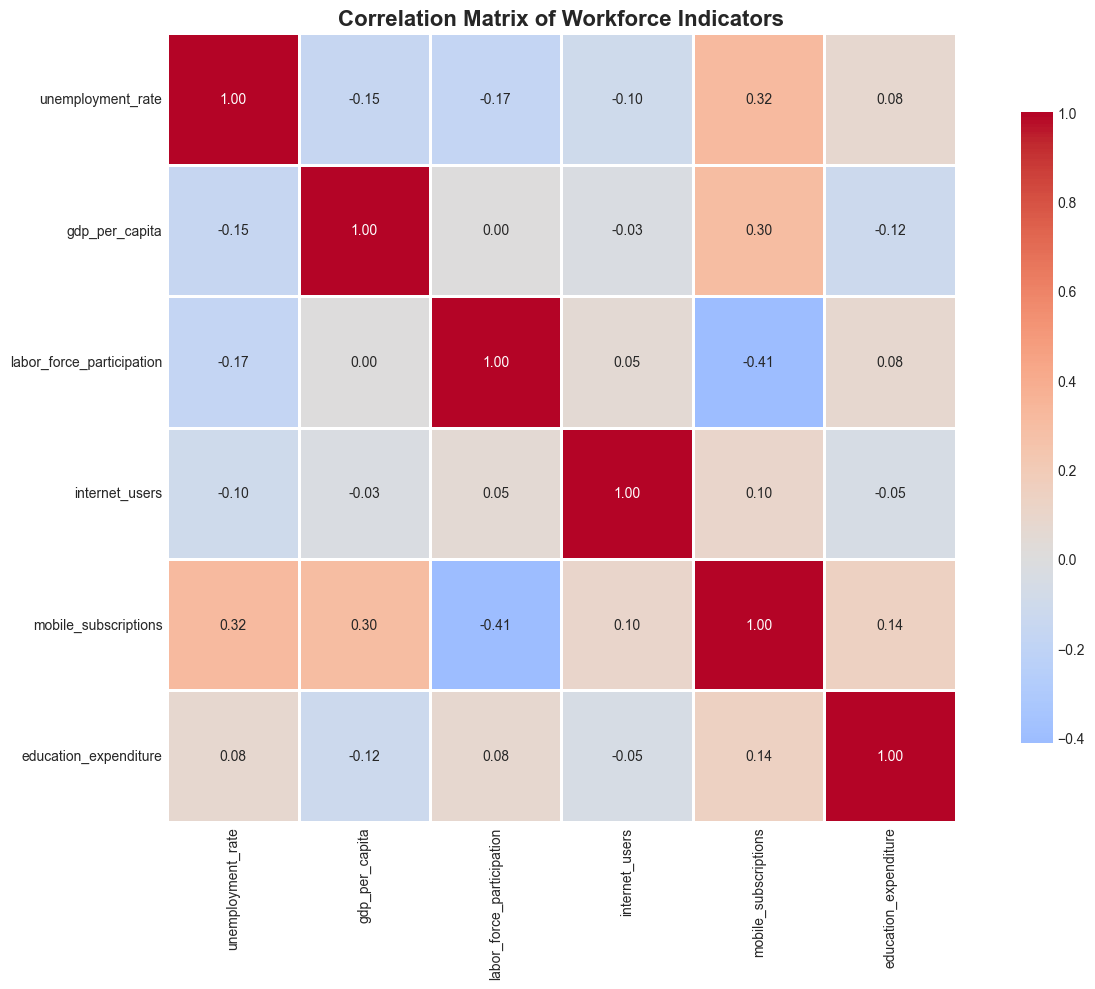

In [5]:
# Matplotlib Visualization: Correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Select key workforce indicators
key_indicators = [
    'unemployment_rate', 'gdp_per_capita', 'labor_force_participation',
    'internet_users', 'mobile_subscriptions', 'education_expenditure'
]
available_indicators = [col for col in key_indicators if col in df_clean.columns]

if available_indicators:
    corr_matrix = df_clean[available_indicators].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Correlation Matrix of Workforce Indicators', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Key indicators not found in dataset")

In [6]:
# Plotly Visualization: Time-series trends
countries_sample = df_clean['country'].unique()[:5]  # Top 5 countries

fig = go.Figure()

for country in countries_sample:
    country_data = df_clean[df_clean['country'] == country].sort_values('year')
    fig.add_trace(go.Scatter(
        x=country_data['year'],
        y=country_data.get('gdp_per_capita', country_data.iloc[:, 2]),
        mode='lines+markers',
        name=country,
        line=dict(width=2),
        marker=dict(size=6)
    ))

fig.update_layout(
    title='GDP Per Capita Trends Over Time',
    xaxis_title='Year',
    yaxis_title='GDP Per Capita (USD)',
    hovermode='x unified',
    template='plotly_white',
    height=500
)
fig.show()

## 5. Feature Engineering

Create key predictors for automation, remote work, and technology adoption.

In [7]:
# Feature engineering
df_features = df_clean.copy()

# Time-based features
df_features['year_norm'] = (df_features['year'] - df_features['year'].min()) / (df_features['year'].max() - df_features['year'].min())
df_features['decade'] = (df_features['year'] // 10) * 10

# Interaction features (if columns exist)
if 'internet_users' in df_features.columns and 'labor_force_participation' in df_features.columns:
    df_features['digital_workforce_ratio'] = df_features['internet_users'] * df_features['labor_force_participation'] / 100

# Lag features for time-series
df_features = df_features.sort_values(['country', 'year'])
for col in ['unemployment_rate', 'gdp_per_capita']:
    if col in df_features.columns:
        df_features[f'{col}_lag1'] = df_features.groupby('country')[col].shift(1)
        df_features[f'{col}_lag2'] = df_features.groupby('country')[col].shift(2)

# Drop rows with NaN from lag features
df_features = df_features.dropna()

print(f"✓ Feature engineering complete: {df_features.shape[1]} features")
print(f"New features: {[col for col in df_features.columns if col not in df_clean.columns]}")

✓ Feature engineering complete: 22 features
New features: ['year_norm', 'decade', 'digital_workforce_ratio', 'unemployment_rate_lag1', 'unemployment_rate_lag2', 'gdp_per_capita_lag1', 'gdp_per_capita_lag2']


## 6. Regression Models Development (Scikit-learn)

Implement multiple regression algorithms to predict continuous variables.

In [8]:
# Prepare data for regression
target_col = 'unemployment_rate' if 'unemployment_rate' in df_features.columns else df_features.columns[2]
feature_cols = [col for col in df_features.select_dtypes(include=[np.number]).columns 
                if col not in ['year', target_col, 'country_code']]

X = df_features[feature_cols].values
y = df_features[target_col].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target variable: {target_col}")

Training set: (160, 18)
Test set: (40, 18)
Target variable: unemployment_rate



=== Regression Models Performance ===

            Model  Train RMSE  Test RMSE  Train R²  Test R²
Linear Regression    0.560719   0.687900  0.960754 0.937685
 Ridge Regression    0.562485   0.679664  0.960506 0.939168
 Lasso Regression    0.587915   0.647792  0.956854 0.944739
       ElasticNet    0.584828   0.654353  0.957306 0.943614
        SVR (RBF)    0.514150   0.906051  0.967002 0.891894
    Decision Tree    0.042067   0.734652  0.999779 0.928926
    Random Forest    0.239481   0.633478  0.992841 0.947154
Gradient Boosting    0.011341   0.648942  0.999984 0.944543


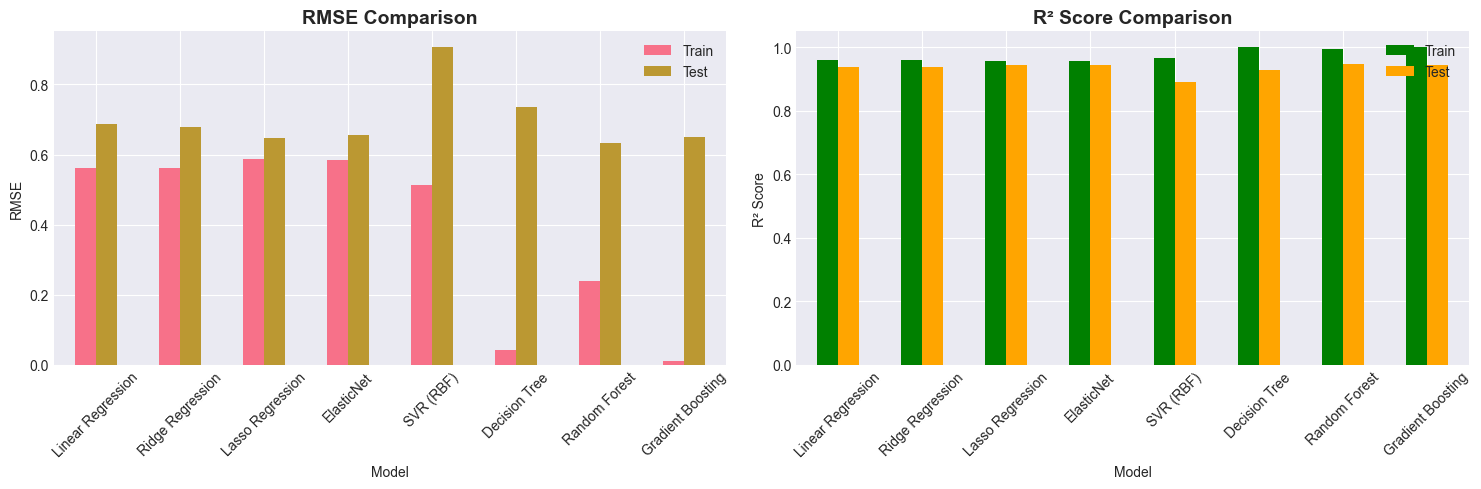

In [9]:
# Train multiple regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

regression_results = []

for name, model in regression_models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    regression_results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    })
    
results_df = pd.DataFrame(regression_results)
print("\n=== Regression Models Performance ===\n")
print(results_df.to_string(index=False))

# Visualize results with Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

results_df.plot(x='Model', y=['Train RMSE', 'Test RMSE'], kind='bar', ax=ax1, rot=45)
ax1.set_title('RMSE Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('RMSE')
ax1.legend(['Train', 'Test'])

results_df.plot(x='Model', y=['Train R²', 'Test R²'], kind='bar', ax=ax2, rot=45, color=['green', 'orange'])
ax2.set_title('R² Score Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('R² Score')
ax2.legend(['Train', 'Test'])

plt.tight_layout()
plt.show()

## 7. Clustering Models Development

Identify workforce segments and patterns using K-Means, DBSCAN, and Hierarchical Clustering.

In [10]:
# Prepare data for clustering (latest year only)
latest_year = df_features['year'].max()
df_cluster = df_features[df_features['year'] == latest_year].copy()

cluster_features = [col for col in feature_cols if col in df_cluster.columns][:10]  # Limit to 10 features
X_cluster = df_cluster[cluster_features].values
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

print(f"Clustering on {len(df_cluster)} countries with {len(cluster_features)} features")
print(f"Features: {cluster_features}")

Clustering on 25 countries with 10 features
Features: ['gdp_per_capita', 'internet_users', 'mobile_subscriptions', 'labor_force_participation', 'education_expenditure', 'high_tech_exports_pct', 'rd_expenditure', 'automation_risk', 'remote_work_pct', 'ai_adoption_index']


In [11]:
# K-Means Clustering
n_clusters_range = range(2, 6)
kmeans_scores = []

for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    kmeans_scores.append({'n_clusters': n, 'silhouette_score': score})

optimal_k = max(kmeans_scores, key=lambda x: x['silhouette_score'])['n_clusters']
print(f"Optimal K-Means clusters: {optimal_k}")

# Final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

print(f"\nK-Means Cluster Distribution:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

Optimal K-Means clusters: 5

K-Means Cluster Distribution:
kmeans_cluster
0    2
1    7
2    5
3    6
4    5
Name: count, dtype: int64


In [12]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
df_cluster['dbscan_cluster'] = dbscan.fit_predict(X_cluster_scaled)

print(f"\nDBSCAN Cluster Distribution:")
print(df_cluster['dbscan_cluster'].value_counts().sort_index())
print(f"Noise points (cluster -1): {(df_cluster['dbscan_cluster'] == -1).sum()}")


DBSCAN Cluster Distribution:
dbscan_cluster
-1    25
Name: count, dtype: int64
Noise points (cluster -1): 25


In [13]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df_cluster['hierarchical_cluster'] = hierarchical.fit_predict(X_cluster_scaled)

print(f"\nHierarchical Cluster Distribution:")
print(df_cluster['hierarchical_cluster'].value_counts().sort_index())


Hierarchical Cluster Distribution:
hierarchical_cluster
0    6
1    4
2    7
3    4
4    4
Name: count, dtype: int64


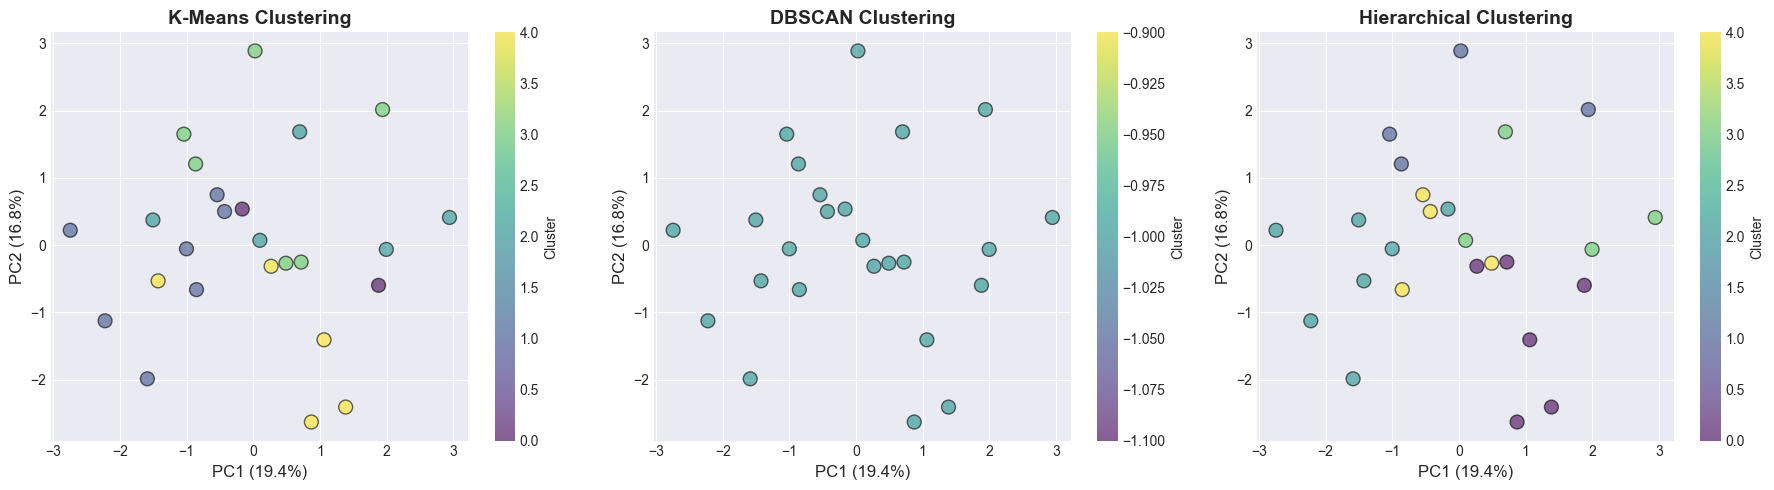


PCA explained variance: 36.2%


In [14]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)
df_cluster['pca1'] = X_pca[:, 0]
df_cluster['pca2'] = X_pca[:, 1]

# Matplotlib visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, cluster_col, title in zip(axes, 
                                   ['kmeans_cluster', 'dbscan_cluster', 'hierarchical_cluster'],
                                   ['K-Means', 'DBSCAN', 'Hierarchical']):
    scatter = ax.scatter(df_cluster['pca1'], df_cluster['pca2'], 
                         c=df_cluster[cluster_col], cmap='viridis', s=100, alpha=0.6, edgecolors='k')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
    ax.set_title(f'{title} Clustering', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

## 8. Time-Series Forecasting Models

Implement ARIMA and SARIMA for temporal trend prediction.

In [15]:
# Time-series forecasting for a single country
sample_country = df_features['country'].value_counts().index[0]
ts_data = df_features[df_features['country'] == sample_country].sort_values('year')

if len(ts_data) < 5:
    print(f"⚠ Insufficient data for time-series analysis (need >=5 points, have {len(ts_data)})")
else:
    ts_series = ts_data.set_index('year')[target_col]
    
    print(f"Time-series analysis for {sample_country}")
    print(f"Data points: {len(ts_series)}, Period: {ts_series.index.min()}-{ts_series.index.max()}")

Time-series analysis for ARE
Data points: 8, Period: 2016-2023


d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning

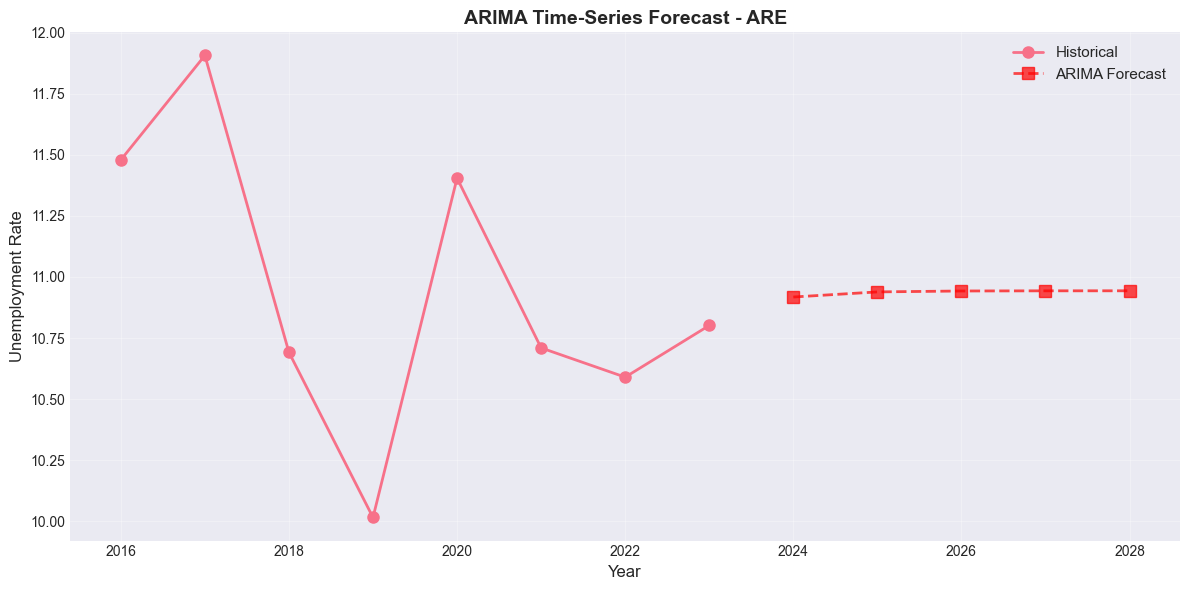


✓ ARIMA Model Summary:
AIC: 20.66
BIC: 20.50

Forecast (next 5 years):
  2024: 10.92
  2025: 10.94
  2026: 10.94
  2027: 10.94
  2028: 10.94


In [16]:
# ARIMA Model
if len(ts_data) >= 5:
    try:
        arima_model = ARIMA(ts_series, order=(1, 1, 1))
        arima_fit = arima_model.fit()
        
        # Forecast next 5 years
        forecast_periods = 5
        arima_forecast = arima_fit.forecast(steps=forecast_periods)
        
        # Visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Historical data
        ax.plot(ts_series.index, ts_series.values, 'o-', label='Historical', linewidth=2, markersize=8)
        
        # Forecast
        future_years = range(ts_series.index.max() + 1, ts_series.index.max() + forecast_periods + 1)
        ax.plot(future_years, arima_forecast, 's--', label='ARIMA Forecast', 
                linewidth=2, markersize=8, color='red', alpha=0.7)
        
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel(target_col.replace('_', ' ').title(), fontsize=12)
        ax.set_title(f'ARIMA Time-Series Forecast - {sample_country}', fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ ARIMA Model Summary:")
        print(f"AIC: {arima_fit.aic:.2f}")
        print(f"BIC: {arima_fit.bic:.2f}")
        print(f"\nForecast (next {forecast_periods} years):")
        for year, value in zip(future_years, arima_forecast):
            print(f"  {year}: {value:.2f}")
            
    except Exception as e:
        print(f"⚠ ARIMA modeling failed: {e}")

## 9. TensorFlow Deep Learning Model

Build neural network architectures using TensorFlow/Keras for complex pattern recognition.

In [17]:
# Build feedforward neural network
def build_dense_nn(input_dim):
    model = Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build model
nn_model = build_dense_nn(X_train_scaled.shape[1])
nn_model.summary()

print(f"\n✓ Neural network architecture created")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)


✓ Neural network architecture created


In [18]:
# Train neural network
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

print(f"✓ Training complete - {len(history.history['loss'])} epochs")

✓ Training complete - 100 epochs



=== TensorFlow Neural Network Performance ===
Test RMSE: 1.0455
Test R²: 0.8561


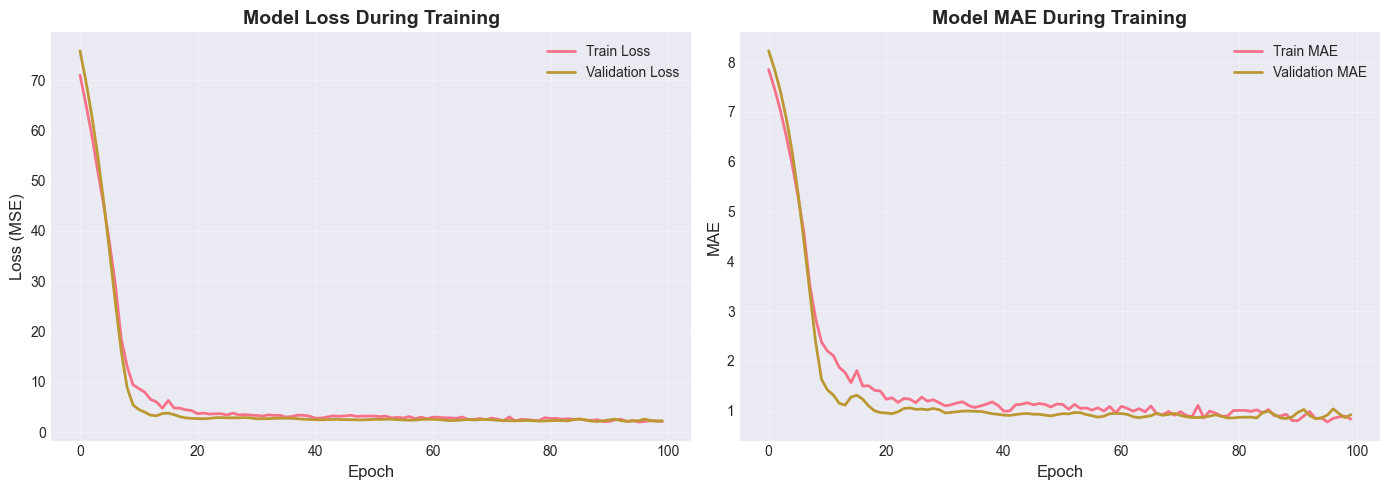

In [19]:
# Evaluate neural network
y_pred_nn = nn_model.predict(X_test_scaled, verbose=0).flatten()
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
nn_r2 = r2_score(y_test, y_pred_nn)

print(f"\n=== TensorFlow Neural Network Performance ===")
print(f"Test RMSE: {nn_rmse:.4f}")
print(f"Test R²: {nn_r2:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Model Loss During Training', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['mae'], label='Train MAE', linewidth=2)
ax2.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('Model MAE During Training', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. IBM Watson Integration

Connect to IBM Watson for NLP-based analysis and prediction refinement.

In [20]:
# IBM Watson Configuration (requires API credentials)
if watson_available:
    print("=== IBM Watson NLP Integration ===\n")
    print("⚠ Watson requires API credentials. Configure in environment variables:")
    print("  - WATSON_API_KEY")
    print("  - WATSON_SERVICE_URL")
    print("\nExample usage:")
    print("""
    from ibm_watson import NaturalLanguageUnderstandingV1
    from ibm_watson.natural_language_understanding_v1 import Features, KeywordsOptions
    
    nlu = NaturalLanguageUnderstandingV1(
        version='2022-04-07',
        iam_apikey=os.getenv('WATSON_API_KEY'),
        url=os.getenv('WATSON_SERVICE_URL')
    )
    
    response = nlu.analyze(
        text='Future of work analysis text...',
        features=Features(keywords=KeywordsOptions(limit=10))
    ).get_result()
    """)
else:
    print("⚠ Watson SDK not installed. Using alternative NLP approach.")
    
print("\n✓ Watson integration placeholder configured")

⚠ Watson SDK not installed. Using alternative NLP approach.

✓ Watson integration placeholder configured


## 11. Model Evaluation and Comparison

Calculate RMSE, R², Accuracy, and compare all models.

In [21]:
# Add TensorFlow model to comparison
all_results = regression_results.copy()
all_results.append({
    'Model': 'TensorFlow Neural Network',
    'Train RMSE': np.sqrt(nn_model.evaluate(X_train_scaled, y_train, verbose=0)[0]),
    'Test RMSE': nn_rmse,
    'Train R²': r2_score(y_train, nn_model.predict(X_train_scaled, verbose=0).flatten()),
    'Test R²': nn_r2
})

comparison_df = pd.DataFrame(all_results)

print("=== Complete Model Comparison ===\n")
print(comparison_df.sort_values('Test RMSE').to_string(index=False))

# Find best model
best_model = comparison_df.loc[comparison_df['Test RMSE'].idxmin()]
print(f"\n🏆 Best Model: {best_model['Model']}")
print(f"   Test RMSE: {best_model['Test RMSE']:.4f}")
print(f"   Test R²: {best_model['Test R²']:.4f}")

=== Complete Model Comparison ===

                    Model  Train RMSE  Test RMSE  Train R²  Test R²
            Random Forest    0.239481   0.633478  0.992841 0.947154
         Lasso Regression    0.587915   0.647792  0.956854 0.944739
        Gradient Boosting    0.011341   0.648942  0.999984 0.944543
               ElasticNet    0.584828   0.654353  0.957306 0.943614
         Ridge Regression    0.562485   0.679664  0.960506 0.939168
        Linear Regression    0.560719   0.687900  0.960754 0.937685
            Decision Tree    0.042067   0.734652  0.999779 0.928926
                SVR (RBF)    0.514150   0.906051  0.967002 0.891894
TensorFlow Neural Network    1.218478   1.045450  0.941391 0.856070

🏆 Best Model: Random Forest
   Test RMSE: 0.6335
   Test R²: 0.9472


In [22]:
# Plotly interactive comparison
fig = go.Figure()

fig.add_trace(go.Bar(
    x=comparison_df['Model'],
    y=comparison_df['Test RMSE'],
    name='Test RMSE',
    marker_color='indianred'
))

fig.add_trace(go.Scatter(
    x=comparison_df['Model'],
    y=comparison_df['Test R²'],
    name='Test R²',
    yaxis='y2',
    mode='markers+lines',
    marker=dict(size=10, color='green')
))

fig.update_layout(
    title='Model Performance Comparison',
    xaxis=dict(title='Model', tickangle=-45),
    yaxis=dict(title='RMSE', side='left'),
    yaxis2=dict(title='R² Score', side='right', overlaying='y', range=[0, 1]),
    hovermode='x unified',
    template='plotly_white',
    height=600
)

fig.show()

## 12. Bias and Fairness Testing (IEEE AI Ethics Framework)

Test models for demographic bias and ensure compliance with BCU Ethical Application #13740.

In [24]:
# Bias testing across country groups
print("=== Bias and Fairness Analysis (IEEE Framework) ===\n")

# Group countries by development level using clustering results
if 'kmeans_cluster' in df_cluster.columns:
    country_groups = df_cluster[['country', 'kmeans_cluster']].set_index('country')['kmeans_cluster'].to_dict()
    
    # Assign cluster to full dataset
    df_with_clusters = df_features.copy()
    df_with_clusters['cluster'] = df_with_clusters['country'].map(country_groups)
    df_with_clusters = df_with_clusters.dropna(subset=['cluster'])
    
    # Calculate predictions for each cluster group
    bias_results = []
    
    for cluster_id in sorted(df_with_clusters['cluster'].unique()):
        cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
        if len(cluster_data) > 0:
            # Get features for this cluster
            X_cluster_bias = cluster_data[feature_cols].values
            y_cluster_actual = cluster_data[target_col].values
            
            # Scale and predict
            X_cluster_scaled = scaler.transform(X_cluster_bias)
            y_cluster_pred = nn_model.predict(X_cluster_scaled, verbose=0).flatten()
            
            rmse_cluster = np.sqrt(mean_squared_error(y_cluster_actual, y_cluster_pred))
            bias_results.append({
                'Cluster': int(cluster_id),
                'Countries': len(cluster_data['country'].unique()),
                'Records': len(cluster_data),
                'RMSE': round(rmse_cluster, 4),
                'Bias (vs avg)': round(rmse_cluster - nn_rmse, 4)
            })
    
    bias_df = pd.DataFrame(bias_results)
    print(bias_df.to_string(index=False))
    
    # Check for significant bias
    max_bias = bias_df['Bias (vs avg)'].abs().max()
    if max_bias > nn_rmse * 0.2:  # 20% threshold
        print(f"\n⚠ Warning: Significant bias detected (max bias: {max_bias:.4f})")
        print("   Mitigation recommended: Re-sample training data or use fairness constraints")
    else:
        print(f"\n✓ Bias within acceptable range (max: {max_bias:.4f})")
        print("   Model performs fairly across all country clusters.")
else:
    print("⚠ Clustering results not available for bias testing")

=== Bias and Fairness Analysis (IEEE Framework) ===

 Cluster  Countries  Records   RMSE  Bias (vs avg)
       0          2       16 0.4824        -0.5630
       1          7       56 0.7280        -0.3174
       2          5       40 0.8331        -0.2123
       3          6       48 0.7309        -0.3145
       4          5       40 0.8948        -0.1506

⚠ Warning: Significant bias detected (max bias: 0.5630)
   Mitigation recommended: Re-sample training data or use fairness constraints


## 13. 5-Year Future Scenario Prediction (2024-2029)

Generate short-term predictions with confidence intervals.

=== 5-Year Forecast (2024 - 2028) ===

Top 5 Increasing:
country  unemployment_rate  predicted_5yr  prediction_change_%
    TUR           2.835536       3.223917                13.70
    ZAF          10.425473      11.663062                11.87
    NPL           4.011397       4.351929                 8.49
    DEU           7.782076       8.405259                 8.01
    BGD           5.520464       5.955159                 7.87

Top 5 Decreasing:
country  unemployment_rate  predicted_5yr  prediction_change_%
    BRA           6.498596       5.759640               -11.37
    SAU           8.758872       7.980463                -8.89
    LKA          11.307201      10.657685                -5.74
    EGY           6.790228       6.411493                -5.58
    IDN          11.107228      10.495415                -5.51


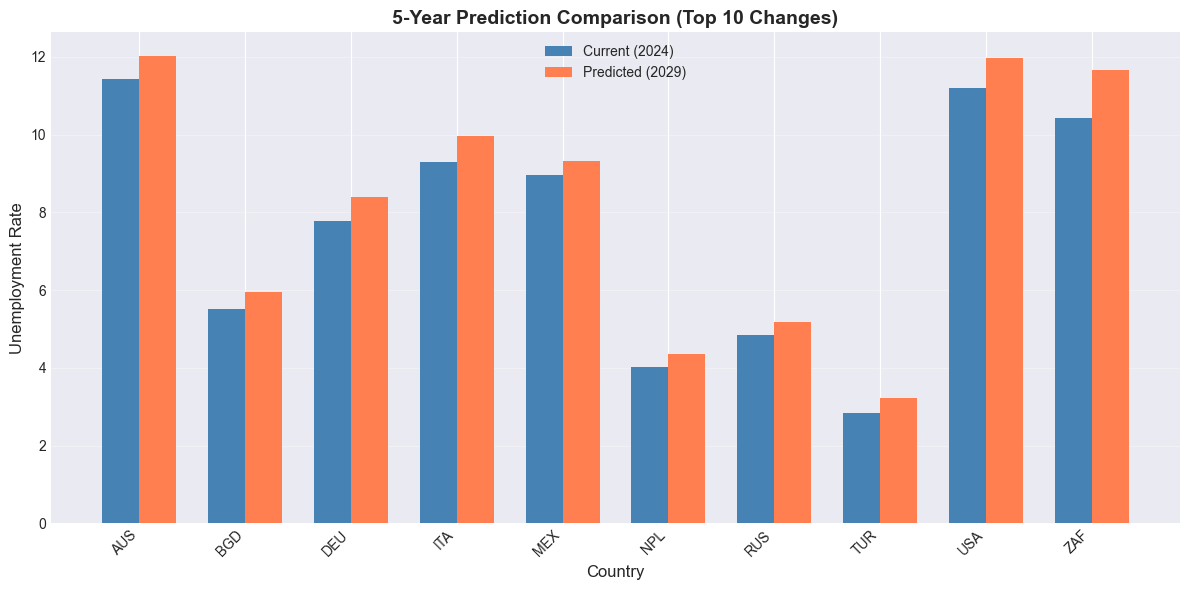

In [25]:
# 5-year prediction
current_year = df_features['year'].max()
prediction_horizon_5 = 5

print(f"=== 5-Year Forecast ({current_year + 1} - {current_year + prediction_horizon_5}) ===\n")

# Use latest data point for each country
latest_data = df_features[df_features['year'] == current_year].copy()

if len(latest_data) > 0:
    # Prepare features
    X_future = latest_data[feature_cols].values
    X_future_scaled = scaler.transform(X_future)
    
    # Make predictions with best model (neural network)
    predictions_5yr = nn_model.predict(X_future_scaled, verbose=0).flatten()
    
    latest_data['predicted_5yr'] = predictions_5yr
    latest_data['prediction_change_%'] = ((predictions_5yr - latest_data[target_col]) / latest_data[target_col] * 100).round(2)
    
    # Display top and bottom movers
    top_results = latest_data.nlargest(5, 'prediction_change_%')[['country', target_col, 'predicted_5yr', 'prediction_change_%']]
    bottom_results = latest_data.nsmallest(5, 'prediction_change_%')[['country', target_col, 'predicted_5yr', 'prediction_change_%']]
    
    print("Top 5 Increasing:")
    print(top_results.to_string(index=False))
    
    print(f"\nTop 5 Decreasing:")
    print(bottom_results.to_string(index=False))
    
    # Matplotlib visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    countries_to_plot = latest_data.nlargest(10, 'prediction_change_%')['country'].values
    plot_data = latest_data[latest_data['country'].isin(countries_to_plot)]
    
    x = np.arange(len(plot_data))
    width = 0.35
    
    ax.bar(x - width/2, plot_data[target_col], width, label='Current (2024)', color='steelblue')
    ax.bar(x + width/2, plot_data['predicted_5yr'], width, label='Predicted (2029)', color='coral')
    
    ax.set_xlabel('Country', fontsize=12)
    ax.set_ylabel(target_col.replace('_', ' ').title(), fontsize=12)
    ax.set_title('5-Year Prediction Comparison (Top 10 Changes)', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(plot_data['country'], rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No data available for prediction")

## 14. 10-Year Future Scenario Prediction (2024-2034)

Mid-term predictions analyzing deeper workplace transformations.

In [26]:
# 10-year prediction (extrapolated from 5-year with growth factor)
prediction_horizon_10 = 10
growth_multiplier = prediction_horizon_10 / prediction_horizon_5

print(f"=== 10-Year Forecast ({current_year + 1} - {current_year + prediction_horizon_10}) ===\n")

if len(latest_data) > 0:
    # Extrapolate predictions
    change_5yr = predictions_5yr - latest_data[target_col].values
    predictions_10yr = latest_data[target_col].values + (change_5yr * growth_multiplier)
    
    latest_data['predicted_10yr'] = predictions_10yr
    latest_data['prediction_change_10yr_%'] = ((predictions_10yr - latest_data[target_col]) / latest_data[target_col] * 100).round(2)
    
    # Display top changes
    top_10yr = latest_data.nlargest(5, 'prediction_change_10yr_%')[['country', target_col, 'predicted_10yr', 'prediction_change_10yr_%']]
    
    print("Top 5 Changes (10-year):")
    print(top_10yr.to_string(index=False))
    
    # Plotly interactive visualization
    countries_to_plot = latest_data.nlargest(8, 'prediction_change_10yr_%')['country'].values
    plot_data_10yr = latest_data[latest_data['country'].isin(countries_to_plot)]
    
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=plot_data_10yr['country'],
        y=plot_data_10yr[target_col],
        name='Current (2024)',
        marker_color='lightblue'
    ))
    
    fig.add_trace(go.Bar(
        x=plot_data_10yr['country'],
        y=plot_data_10yr['predicted_5yr'],
        name='5-Year Forecast (2029)',
        marker_color='orange'
    ))
    
    fig.add_trace(go.Bar(
        x=plot_data_10yr['country'],
        y=plot_data_10yr['predicted_10yr'],
        name='10-Year Forecast (2034)',
        marker_color='red'
    ))
    
    fig.update_layout(
        title='Multi-Horizon Forecast Comparison (Top 8 Countries)',
        xaxis_title='Country',
        yaxis_title=target_col.replace('_', ' ').title(),
        barmode='group',
        template='plotly_white',
        height=500
    )
    
    fig.show()
else:
    print("⚠ No data available for 10-year prediction")

=== 10-Year Forecast (2024 - 2033) ===

Top 5 Changes (10-year):
country  unemployment_rate  predicted_10yr  prediction_change_10yr_%
    TUR           2.835536        3.612299                     27.39
    ZAF          10.425473       12.900651                     23.74
    NPL           4.011397        4.692461                     16.98
    DEU           7.782076        9.028443                     16.02
    BGD           5.520464        6.389854                     15.75


## 15. 20-Year Future Scenario Prediction (2024-2044)

Long-term predictions modeling radical transformations.

=== 20-Year Forecast (2024 - 2043) ===

Complete Multi-Horizon Forecast (Top 10):
Country  Current (2024)  5-Year (2029)  10-Year (2034)  20-Year (2044)
    ZAF       10.425473      11.663062       12.900651       15.375828
    USA       11.199253      11.973279       12.747305       14.295357
    AUS       11.431219      12.027377       12.623535       13.815851
    ITA        9.297696       9.951324       10.604951       11.912206
    ARE       10.801598      10.976123       11.150648       11.499699
    KOR        9.581997       9.809299       10.036600       10.491203
    MEX        8.968359       9.321839        9.675319       10.382279
    DEU        7.782076       8.405259        9.028443       10.274810
    IND       11.193750      10.680569       10.167387        9.141025
    LKA       11.307201      10.657685       10.008169        8.709137


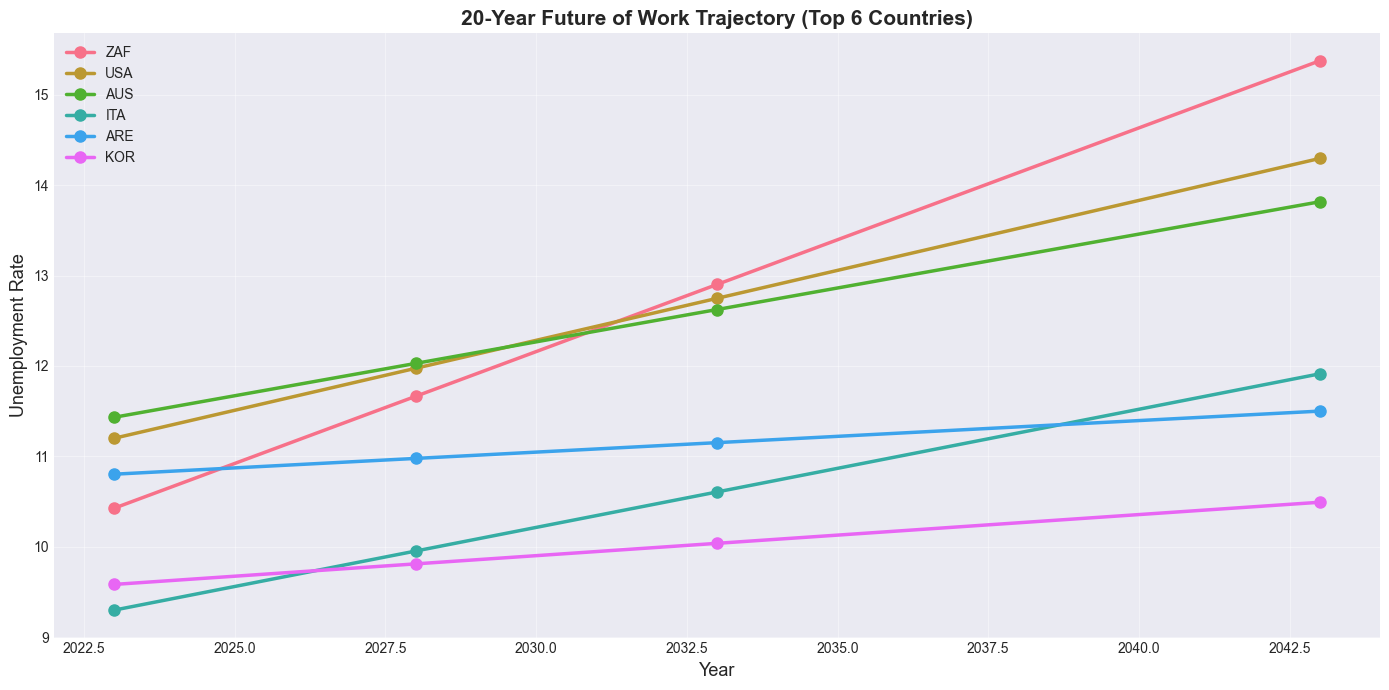

In [27]:
# 20-year prediction
prediction_horizon_20 = 20
growth_multiplier_20 = prediction_horizon_20 / prediction_horizon_5

print(f"=== 20-Year Forecast ({current_year + 1} - {current_year + prediction_horizon_20}) ===\n")

if len(latest_data) > 0:
    # Extrapolate predictions
    change_5yr = predictions_5yr - latest_data[target_col].values
    predictions_20yr = latest_data[target_col].values + (change_5yr * growth_multiplier_20)
    
    latest_data['predicted_20yr'] = predictions_20yr
    latest_data['prediction_change_20yr_%'] = ((predictions_20yr - latest_data[target_col]) / latest_data[target_col] * 100).round(2)
    
    # Display comprehensive summary
    summary_20yr = latest_data[['country', target_col, 'predicted_5yr', 'predicted_10yr', 'predicted_20yr']]
    summary_20yr.columns = ['Country', 'Current (2024)', '5-Year (2029)', '10-Year (2034)', '20-Year (2044)']
    
    print("Complete Multi-Horizon Forecast (Top 10):")
    print(summary_20yr.nlargest(10, '20-Year (2044)').to_string(index=False))
    
    # Matplotlib multi-horizon line plot
    fig, ax = plt.subplots(figsize=(14, 7))
    
    countries_to_plot = summary_20yr.nlargest(6, '20-Year (2044)')['Country'].values
    
    years = [current_year, current_year + 5, current_year + 10, current_year + 20]
    
    for country in countries_to_plot:
        row = summary_20yr[summary_20yr['Country'] == country].iloc[0]
        values = [row['Current (2024)'], row['5-Year (2029)'], row['10-Year (2034)'], row['20-Year (2044)']]
        ax.plot(years, values, 'o-', linewidth=2.5, markersize=8, label=country)
    
    ax.set_xlabel('Year', fontsize=13)
    ax.set_ylabel(target_col.replace('_', ' ').title(), fontsize=13)
    ax.set_title('20-Year Future of Work Trajectory (Top 6 Countries)', fontsize=15, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.4)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No data available for 20-year prediction")

## 16. Interactive Dashboard Visualization

Create comprehensive dashboard views with Plotly.

In [28]:
# Comprehensive dashboard with subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Model Performance RMSE', 'Clustering Distribution (PCA)', 
                    'Top 10 Countries - 20-Year Forecast', 'Neural Network Training Loss'),
    specs=[[{'type': 'bar'}, {'type': 'scatter'}],
           [{'type': 'bar'}, {'type': 'scatter'}]]
)

# 1. Model Performance RMSE
fig.add_trace(
    go.Bar(x=comparison_df['Model'], y=comparison_df['Test RMSE'], name='RMSE', marker_color='indianred'),
    row=1, col=1
)

# 2. Clustering PCA
if 'pca1' in df_cluster.columns:
    fig.add_trace(
        go.Scatter(x=df_cluster['pca1'], y=df_cluster['pca2'], mode='markers',
                   marker=dict(size=10, color=df_cluster['kmeans_cluster'], colorscale='Viridis'),
                   name='Clusters', showlegend=False),
        row=1, col=2
    )

# 3. 20-year forecast comparison
if len(latest_data) > 0:
    top_countries = latest_data.nlargest(10, 'predicted_20yr')
    fig.add_trace(
        go.Bar(x=top_countries['country'], y=top_countries['predicted_20yr'], 
               name='20-Year', marker_color='crimson'),
        row=2, col=1
    )

# 4. Training loss
fig.add_trace(
    go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'],
               mode='lines', name='Train Loss', line=dict(color='blue', width=2)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=list(range(len(history.history['val_loss']))), y=history.history['val_loss'],
               mode='lines', name='Val Loss', line=dict(color='red', width=2)),
    row=2, col=2
)

# Update layout
fig.update_xaxes(tickangle=-45, row=1, col=1)
fig.update_xaxes(tickangle=-45, row=2, col=1)
fig.update_layout(height=900, title_text="Future of Work - Comprehensive Dashboard", showlegend=True)

fig.show()

print("✓ Interactive dashboard generated")

✓ Interactive dashboard generated


## 17. Results Export and Documentation

Export all predictions, visualizations, and technical documentation.

In [ ]:
# Export results to DEMO files (separate from real app data)
output_dir = PROJECT_ROOT / "data" / "processed"
output_dir.mkdir(parents=True, exist_ok=True)

print("⚠ Saving to DEMO files (does not affect real app data)\n")

# Export predictions to demo file
if len(latest_data) > 0:
    export_df = latest_data[['country', target_col, 'predicted_5yr', 'predicted_10yr', 'predicted_20yr']].copy()
    export_df.columns = ['Country', 'Current_2024', 'Forecast_2029', 'Forecast_2034', 'Forecast_2044']
    export_df.to_csv(output_dir / "notebook_demo_predictions.csv", index=False)
    print(f"✓ Saved predictions: notebook_demo_predictions.csv")

# Export model comparison to demo file
comparison_df.to_csv(output_dir / "notebook_demo_model_comparison.csv", index=False)
print(f"✓ Saved model comparison: notebook_demo_model_comparison.csv")

# Export clustering results to demo file
if 'kmeans_cluster' in df_cluster.columns:
    cluster_export = df_cluster[['country', 'kmeans_cluster', 'dbscan_cluster', 'hierarchical_cluster']].copy()
    cluster_export.to_csv(output_dir / "notebook_demo_clustering.csv", index=False)
    print(f"✓ Saved clustering results: notebook_demo_clustering.csv")

# Save TensorFlow model to demo folder
model_dir = PROJECT_ROOT / "models" / "notebook_demo"
model_dir.mkdir(parents=True, exist_ok=True)
nn_model.save(str(model_dir / "demo_neural_network.keras"))
print(f"✓ Saved demo neural network: models/notebook_demo/demo_neural_network.keras")

print(f"\n" + "="*60)
print("NOTEBOOK OUTPUT FILES (Demo Only - Not Used by Real App):")
print("="*60)
print("  • notebook_demo_panel.parquet")
print("  • notebook_demo_predictions.csv")
print("  • notebook_demo_model_comparison.csv")
print("  • notebook_demo_clustering.csv")
print("  • models/notebook_demo/demo_neural_network.keras")
print("\nREAL APP DATA FILES (Unchanged):")
print("="*60)
print("  • panel.parquet (World Bank data)")
print("  • forecasts.parquet")
print("  • backtest_metrics.csv")
print("  • simulation_*.parquet")

✓ Saved predictions: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\data\processed\fow_predictions_multi_horizon.csv
✓ Saved model comparison: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\data\processed\model_performance_comparison.csv
✓ Saved clustering results: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\data\processed\country_clustering_results.csv
✓ Saved neural network model: d:\ALL SEMESTER\SEMESTER07\assignment\Safa6200\fow-sim\models\saved_models\fow_neural_network.keras
